# Brainstation Final Project Rough Draft.


Quick Summary: This is my project intending to find insights from a csv file containing metacritic information on video games from 1993-2021.

Why chose this dataset: I like video games and this seemed like it would be a decent topic?

Hypothesis: Are Games released for the current/previous generation of systems are generally rated higher than games released for prior generations?




### Step 1: Importing Important Libraries and Data:

In [31]:
#Import Stuff:
!pip -q install dataprep

import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from scipy import stats
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

from dataprep.eda import *



#### Get the Data

The data consits of the following columns: Name (The official release name of the game), Platform (which platform the game released on), Release Date (The release date of that game on that platform), summary (the official description of the game), Meta Score (the metacritic score of the game ranging from 0-100) and the User Review Score (ranging from 0-10)

There are some potential things to consider: 

The first is the PC platform. Even though it's listed as one platform, it spans games all the way from 1993 - present as every PC game is technically playable on Windows (even though compability issues exist). So any analysis involving "best platform over time"  would need to exclude it.

I'm going to make the cutoff being games released in 2014 or later as being current. Essentially counting PS4/XB1 and Beyond as Current. There are some minor issues with this because of the WiiU and PSVITA but I feel this is useful enough

Information prior to the year 2000 is likely to be inaccurate given the less developed internet and review setup.


In [2]:
df = pd.read_csv("all_games.csv")
df

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9
...,...,...,...,...,...,...
18795,Fast & Furious: Showdown,Xbox 360,"May 21, 2013",Fast & Furious: Showdown takes some of the fra...,22,1.3
18796,Drake of the 99 Dragons,Xbox,"November 3, 2003",Drake is out for revenge in a supernatural Hon...,22,1.7
18797,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,"September 22, 2015","Head out on a journey of redemption, driven by...",21,2.9
18798,Infestation: Survivor Stories (The War Z),PC,"October 15, 2012","(Formerly known as ""The War Z"") It has been 5 ...",20,1.7


In [3]:
#Basic information

df.info()

#Describe the data

df.describe()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          18800 non-null  object
 1   platform      18800 non-null  object
 2   release_date  18800 non-null  object
 3   summary       18686 non-null  object
 4   meta_score    18800 non-null  int64 
 5   user_review   18800 non-null  object
dtypes: int64(1), object(5)
memory usage: 881.4+ KB


name            object
platform        object
release_date    object
summary         object
meta_score       int64
user_review     object
dtype: object

Some issues from basic exploration:

-Summary has some nulls

-release_date is an object instead of a datetime object

-user_view is an object instead of a float or int

The next step would be to fix this

### Step 2: Data Cleaning and Manipulation

In [4]:
df[df['summary'].isna()]

,name,platform,release_date,summary,meta_score,user_review
833,Injustice 2: Legendary Edition,PlayStation 4,"March 27, 2018",NaN,88,7.6
1472,Moto Racer Advance,Game Boy Advance,"December 5, 2002",NaN,86,tbd
1535,Mini Metro,Switch,"August 30, 2018",NaN,86,8.4
1649,Out of the Park Baseball 13,PC,"April 9, 2012",NaN,85,7.8
2427,Guild Wars 2: Path of Fire,PC,"September 22, 2017",NaN,83,7.3
...,...,...,...,...,...,...
17999,One Piece: Unlimited Cruise SP,PlayStation 4,"February 10, 2012",NaN,46,7.0
18134,AeternoBlade II,Wii U,"October 11, 2019",NaN,44,4.4
18253,Surgeon Simulator: Experience Reality,PlayStation 4,"December 3, 2016",NaN,43,4.3
18532,The Ripping Friends,Game Boy Advance,"March 24, 2002",NaN,38,tbd


This reveals that some games have a "NaN" for the summary column. This also shows why the "User_Review" was an object instead of an int or float because of the "tbd". Those need to be corrected

Best way to correct the Summary would be to say "This is x game for y platform released z date"

In [5]:
df = pd.read_csv("all_games.csv")
df['summary'] = df['summary'].fillna("This is " + df['name'] + " for the " + df['platform'].astype(str) + " and was released on " + df['release_date'].astype(str))


In [6]:
df.loc[df['name']=='Injustice 2: Legendary Edition']


,name,platform,release_date,summary,meta_score,user_review
833,Injustice 2: Legendary Edition,PlayStation 4,"March 27, 2018",This is Injustice 2: Legendary Edition for the...,88,7.6


In [7]:
df["summary"][833]

'This is Injustice 2: Legendary Edition for the  PlayStation 4 and was released on March 27, 2018'

In [8]:
df.head()

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9


The summary has been resolved. Now to address the User Reviews. The goal would be to remove the Tbds and format them in a way similar to the meta_scores

In [9]:
df.loc[df['user_review']== 'tbd']

,name,platform,release_date,summary,meta_score,user_review
679,Synth Riders,PlayStation 4,"August 10, 2021",Synth Riders is your freestyle dancing VR rhyt...,89,tbd
963,Tiger Woods PGA Tour 2005,GameCube,"September 20, 2004",Challenge professional golfer Tiger Woods to c...,88,tbd
1277,NASCAR 2005: Chase for the Cup,Xbox,"August 31, 2004",Do you have what it takes to be a top NASCAR d...,86,tbd
1472,Moto Racer Advance,Game Boy Advance,"December 5, 2002",This is Moto Racer Advance for the Game Boy A...,86,tbd
2098,Mushihimesama,Switch,"June 15, 2021",Mushihimesama (Bug Princess in English) is a v...,84,tbd
...,...,...,...,...,...,...
18594,Air Conflicts: Aces of World War II,PSP,"April 14, 2009",Air Conflicts is an arcade flight simulator ga...,36,tbd
18639,King of Clubs,Wii,"August 4, 2008","Never the same game twice, this absorbing and ...",35,tbd
18700,Jenga World Tour,DS,"November 13, 2007",Jenga is based on the world famous wooden bloc...,32,tbd
18715,Dream Chronicles,PlayStation 3,"November 23, 2010",Unlock the secrets of the beautiful and myster...,31,tbd


In [10]:
df_b = df[df.user_review != "tbd"]
df_b.loc[df_b['user_review']== 'tbd']

df_b['user_review'] = df_b['user_review'].astype(float)
df_b['user_review'] = df_b['user_review']*10

df_b['user_review'] = df_b['user_review'].astype(int)
df_b.head()

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,91
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,74
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,77
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,84
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,79


Now to change the release_date to a datetime object:

In [11]:
df_c = df_b.copy()
df_c['release_date']= pd.to_datetime(df_c['release_date'])
 
# Check the format of 'Date' column
df_c.head()
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17435 entries, 0 to 18799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          17435 non-null  object        
 1   platform      17435 non-null  object        
 2   release_date  17435 non-null  datetime64[ns]
 3   summary       17435 non-null  object        
 4   meta_score    17435 non-null  int64         
 5   user_review   17435 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 953.5+ KB


Releasedate is now a datetime object. 

### Step 3: Data Visualization and Insights

<AxesSubplot: xlabel='platform', ylabel='count'>

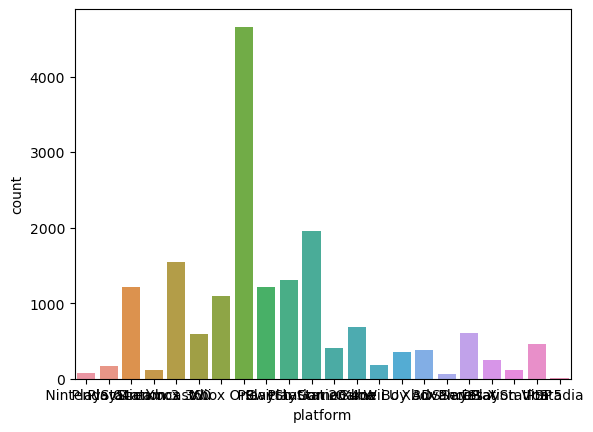

In [12]:
sns.countplot(x = "platform", data = df_c)

Need to format this better:

<AxesSubplot: xlabel='count', ylabel='platform'>

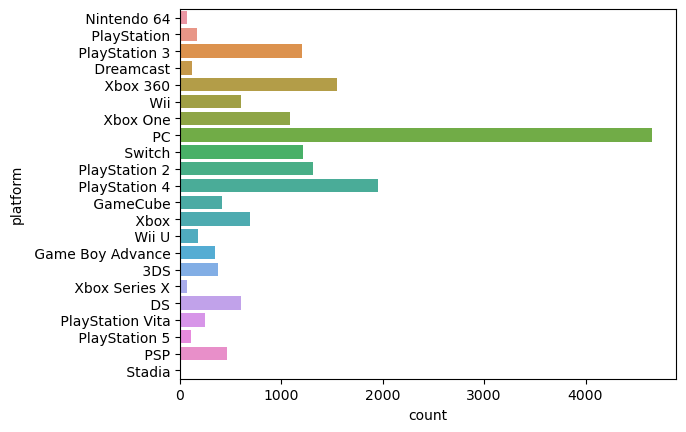

In [13]:
sns.countplot(y = "platform", data = df_c)

In [14]:
df_c.groupby(['platform']).count()

,name,release_date,summary,meta_score,user_review
platform,,,,,
3DS,378,378,378,378,378
DS,599,599,599,599,599
Dreamcast,119,119,119,119,119
Game Boy Advance,349,349,349,349,349
GameCube,413,413,413,413,413
Nintendo 64,71,71,71,71,71
PC,4660,4660,4660,4660,4660
PSP,464,464,464,464,464
PlayStation,166,166,166,166,166


So here, we see that PC is nearly more than double the next highest platform. This makes sense since PC just means "any version of Windows". Meaning, in theory, you can play the oldest PC game on a 2023 Windows Machine (obviously there would be compatability issues but it is possible).

In [15]:
df_c.groupby(['platform']).mean()

,meta_score,user_review
platform,,
3DS,70.198413,71.039683
DS,67.380634,71.268781
Dreamcast,74.915966,78.705882
Game Boy Advance,69.914040,74.670487
GameCube,71.368039,74.307506
Nintendo 64,78.436620,79.549296
PC,72.171245,69.181974
PSP,69.252155,72.678879
PlayStation,74.536145,77.222892


<AxesSubplot: xlabel='meta_score', ylabel='platform'>

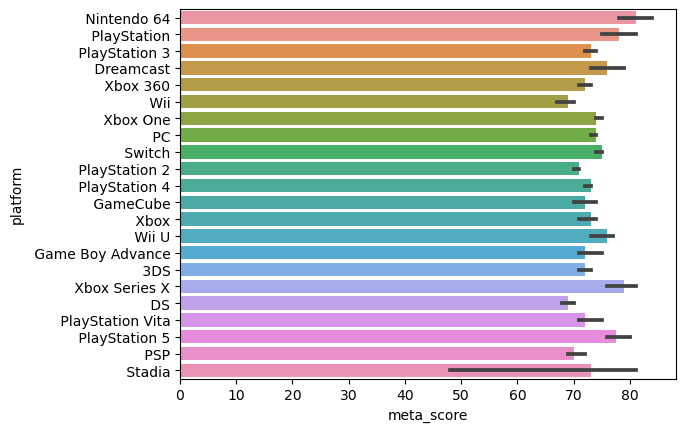

In [16]:
sns.barplot(data=df_c, x="meta_score", y="platform", estimator = np.median)

Here, we grouped the average metacritic score for each platform. Most platforms means range between the mid 60s to 70s. This generally confirms we are on the right track here. It is the "C" range. Most platforms generally have at least decent games. But that's technically incorrect and a form of survirosship bias.

Like on Steam (the biggest online distributor of PC games), there's around 20 new games that come out every day. Many of which are either scams or asset flips. Those get buried under all the other games and thus also forgotten so they don't get reviewed so they aren't represented in the data.

I suspect this is what's happening with games released in the 1990's. Since online reviews weren't as prominent, people are genrally going to focus on the more worthwhile games. Meaning a higher proportion of older games have good reviews by virtue of survivorship bias

In [17]:
df_new = pd.DataFrame(df_c.groupby(df_c['release_date'].dt.strftime('%Y %m'))['meta_score'].count())
df_new.sort_values(by='release_date', inplace = True)
df_new

,meta_score
release_date,
1995 04,1
1996 01,1
1996 02,2
1996 03,1
1996 06,1
...,...
2021 06,69
2021 07,66
2021 08,58


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


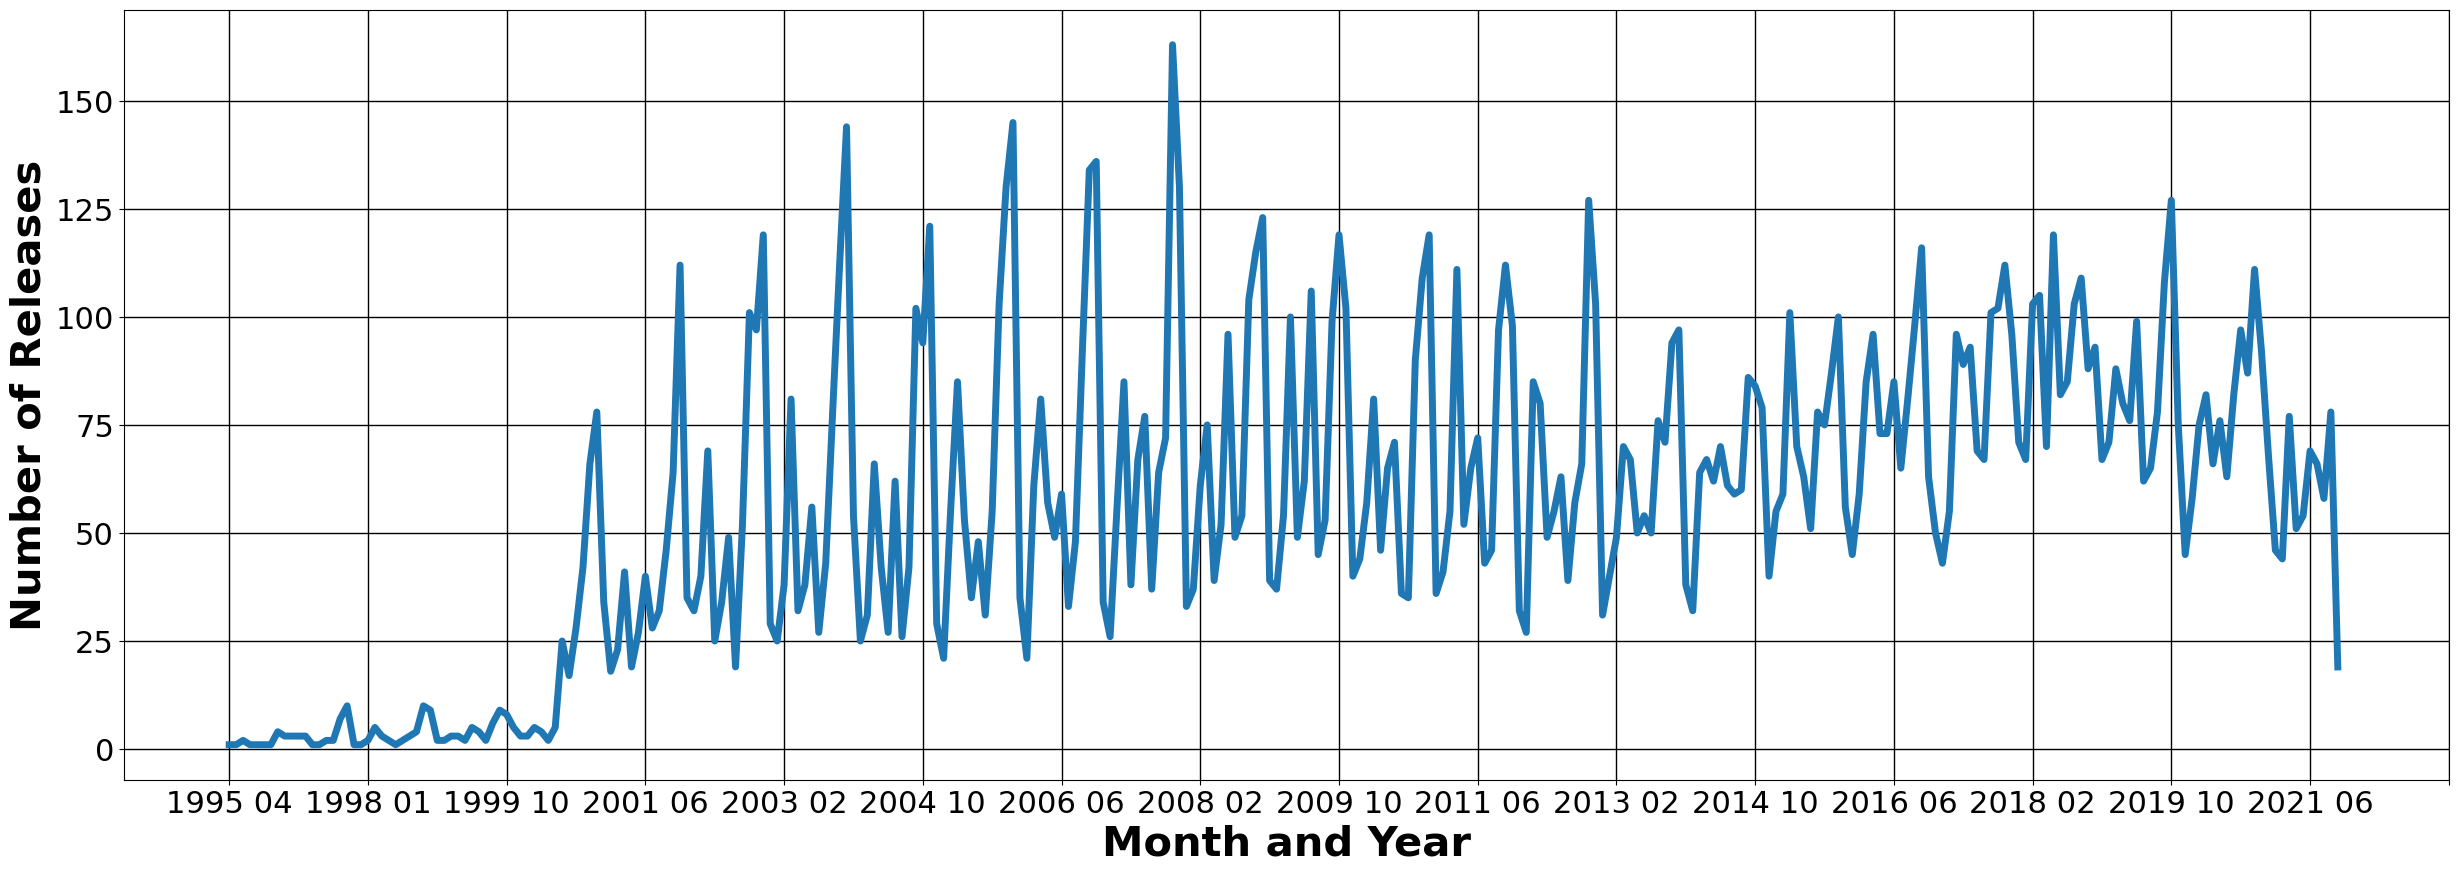

<Figure size 640x480 with 0 Axes>

In [18]:
plt.plot(df_new,  linewidth=5)
plt.gcf().set_size_inches(30, 10)
plt.xlabel('Month and Year', fontweight='bold', color='black',
   fontsize='30', horizontalalignment='center')
plt.ylabel('Number of Releases', fontweight='bold', color='black',
   fontsize='30', horizontalalignment='center')
#plt.tick_params(axis='x', colors='red', direction='out', length=20, width=20)
plt.xticks(np.arange(0, 330, 20))

plt.tick_params(axis='both', which='major', labelsize=22)
#plt.grid()
plt.style.use('classic')
plt.grid(color='black', linestyle='-', linewidth=1)
#plt.set_facecolor('xkcd:salmon')
plt.figure(facecolor='white')
plt.show()

The key insight from all this would be that in the early 2000s, most games seemed to release in q4 of the year, likely to capitalize on the christmas season. But now the peak isn't as clear for some reason.

Another insight (and possible explanation for that last line) is the number of platforms. In the early 2000s, you had the PS2, Xbox, DS, GBA, PC, Xbox 360, PSP, PS3, Gamecube and Wii in relatively close succession and available at roughly the same times. Metacritic counts different versions of the same game on different platforms as a new game regardless of how true that was. Like, Need for Speed Most Wanted for example, was on PS2, PSP, Xbox, Gamecube, GBA, NDS, Xbox 360 and PC. You had effectively 8 entries per game even if there were only 2-3 actually different versions of the game. This inflates both the number of games and their reviews in earlier years.

Wheras from like 2014 onwards, the number of releases seem to have gone down because there are fewer "main platforms". The main 3 were PS4, XB1 and PC. The WiiU and PSVITA weren't getting much support. The 3DS was chugging on by. The Switch released in late 2017 and was very popular which explains the bump in 2018 and 2019.

Of course, there is the elephant in the room we are missing. Mobile games. iOS and Android are effectively the DS and PSP of now. Except much bigger than the DS. Oh, and there are way more digital only games on Steam and Itch. If are going only by the games that Metacritic reviews, that's going to miss these other games.

We kinda see this happening in early 2000s. The DS is the second best selling system of all time. Behind only the PS2. The PSP, PS3, GBA, 3DS all sold around 80 million units each but the PS3 dwarfs them in number of entries on Metacritic. Which makes sense, the PS3 and 360 were the main systems of the time. Most critics would be paying more attention to them than PSP or 3DS games.


In [19]:
df_ave_m = pd.DataFrame(df_c.groupby(df_c['release_date'].dt.strftime('%Y %m'))['meta_score'].mean())
df_ave_m.sort_values(by='release_date', inplace = True)
df_ave_m

,meta_score
release_date,
1995 04,86.000000
1996 01,89.000000
1996 02,84.000000
1996 03,91.000000
1996 06,94.000000
...,...
2021 06,75.086957
2021 07,77.575758
2021 08,74.603448


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


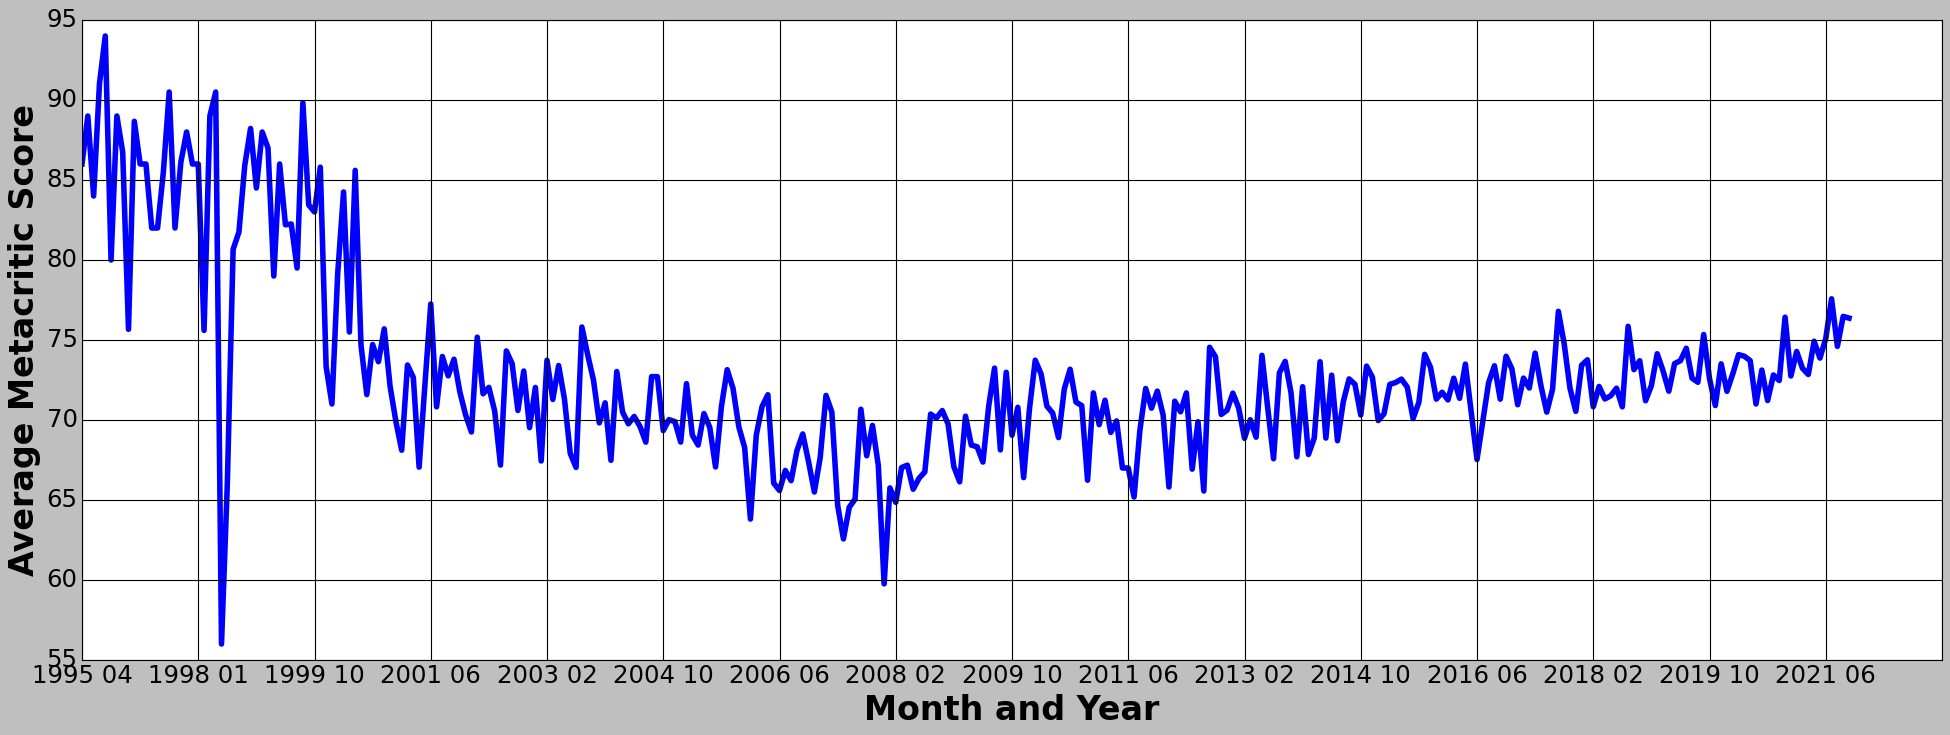

<Figure size 640x480 with 0 Axes>

In [20]:
plt.plot(df_ave_m,  linewidth=5)
plt.gcf().set_size_inches(30, 10)
plt.xlabel('Month and Year', fontweight='bold', color='black',
   fontsize='30', horizontalalignment='center')
plt.ylabel('Average Metacritic Score', fontweight='bold', color='black',
   fontsize='30', horizontalalignment='center')
#plt.tick_params(axis='x', colors='red', direction='out', length=20, width=20)
plt.xticks(np.arange(0, 330, 20))

plt.tick_params(axis='both', which='major', labelsize=22)
#plt.grid()
plt.style.use('classic')
plt.grid(color='black', linestyle='-', linewidth=1)
#plt.set_facecolor('xkcd:salmon')
plt.figure(facecolor='white')
plt.show()

Plotting "counts vs year" and "average score vs year" leads credence to my points of survivorship bias. We saw how there were relatively very few releases in the 1990s compared to the 2000s yet are rated much higher. It appears that reviews of 1990s games tended to be of those few games that were good thereby giving that decade a "boost" in average score. This is most evident by the massive dip that seemed to have happened on "1998 02". It's very likely that few or even a single medicore game was reviewed that month which dragged the avaerage down for that month

After 2000, the average score per year generally hovers between the mid 60s-70s. Which seems more representative given that's when critic reviews of games became much more commonplace and widespread. This also indicates that modern games may not be signficantly worse than their older counterparts as they maintain a similar average meta score despite the lower quantity of releases (that were reviewed)


### Step 4: Data Modelling and Validation

Text(0.5, 0, 'Meta Score')

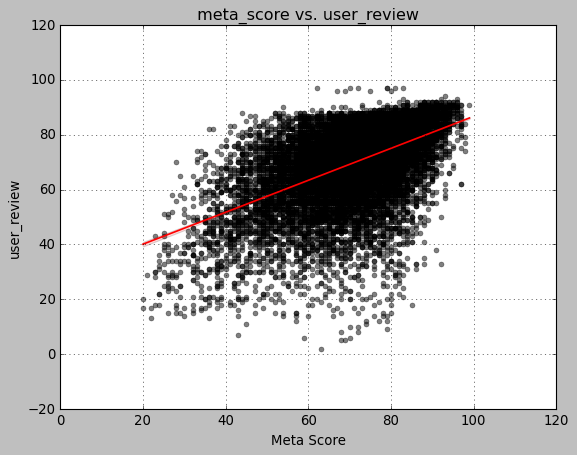

In [60]:
ax = sns.regplot(x="meta_score", y="user_review", data=df_c,
            scatter_kws = {"color": "black", "alpha": 0.5},
            line_kws = {"color": "red"})


ax.set_title(" meta_score vs. user_review ")
ax.grid()
ax.set_xlabel("Meta Score")


In [22]:
stats.pearsonr(df_c['meta_score'], df_c['user_review'])

PearsonRResult(statistic=0.5262604881717088, pvalue=0.0)

In [23]:
cormat = df_c.corr()
round(cormat,4)

,meta_score,user_review
meta_score,1.0000,0.5263
user_review,0.5263,1.0000


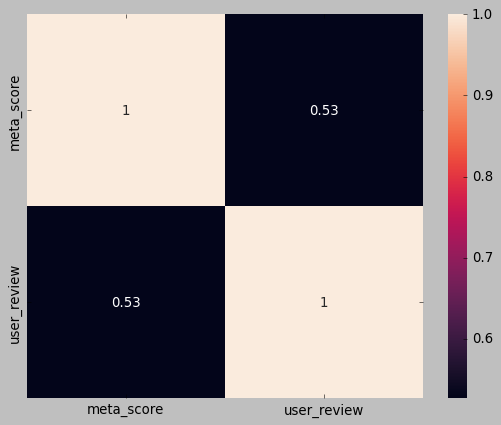

In [24]:
sns.heatmap(cormat, annot= True);

To be fair, I wasn't entirely sure how to measure the validty of my data here given it's mostly 1-2 variables next to dates. Not an entire column of correlated values. Still, I figured it would be worthwhile looking at the correlation between meta_scores and user scores.

There is a weak correlation between meta and user scores using a linear approach. This appears to reflect that that critics generally tend to give scores around the 40-100 range with the mean closer to 70-ish while users are more likely to give 0-20s and 100s to games they really dislike or like. Users are also more prone to "review bombing" or engaging in similar tactics while critics are more consistent.

Still, I'm going to try and model a multivariable linear regression just to see if I can

In [50]:
X = df_c[['platform', 'release_date', 'user_review']]
y = df_c['meta_score']

#y
#1 hot encode the platforms
X = pd.get_dummies(X, columns=['platform'])
#Convert date from datetime to something else
X['release_date'] = pd.to_datetime(X['release_date'])
earliest_date = X['release_date'].min()

# Convert dates to numerical values
X['release_date'] = (X['release_date'] - earliest_date).dt.days
X

,release_date,user_review,platform_ 3DS,platform_ DS,platform_ Dreamcast,platform_ Game Boy Advance,platform_ GameCube,platform_ Nintendo 64,platform_ PC,platform_ PSP,...,platform_ PlayStation 5,platform_ PlayStation Vita,platform_ Stadia,platform_ Switch,platform_ Wii,platform_ Wii U,platform_ Xbox,platform_ Xbox 360,platform_ Xbox One,platform_ Xbox Series X
0,1303,91,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1970,74,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4748,77,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1592,84,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4748,79,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18795,6596,13,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
18796,3109,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
18797,7450,29,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18798,6378,17,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


y_pred = lr.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

print('R2 score:', r2_score(y_test, y_pred))
print('Mean squared error:', mean_squared_error(y_test, y_pred))


R2 score: 0.31393407567187037
Mean squared error: 97.57226183711597


The R-squared (R2) score is a statistical measure that represents the proportion of variance in the dependent variable that is explained by the independent variables in a regression model. The R2 score ranges from 0 to 1, where 1 indicates that the model perfectly predicts the dependent variable, and 0 indicates that the model does not explain any of the variance in the dependent variable.

An R2 score of 0.3139 suggests that my model explains approximately 31.39% of the variance in the dependent variable (meta score), based on the independent variables (platform, release date, and user score) that you included in the model.

In other words, the remaining 68.61% of the variance in the dependent variable is unexplained by the model, which could be due to various factors such as measurement errors, missing variables, or non-linear relationships between the independent and dependent variables.

The mean squared error (MSE) is another evaluation metric for regression models that measures the average squared difference between the predicted values and the actual values. MSE is calculated by taking the sum of the squared residuals and dividing it by the number of observations in the dataset.

An MSE of 97.57 suggests that on average, the squared difference between the predicted meta scores and the actual meta scores is 97.57. In other words, the model's predictions are off by an average of the square root of 97.57, or approximately 9.87 meta score units.


I personally love how my more complex model that tries to get platform, release date and user score to predict meta_score results in a less accurate model than just "user vs meta score" lol

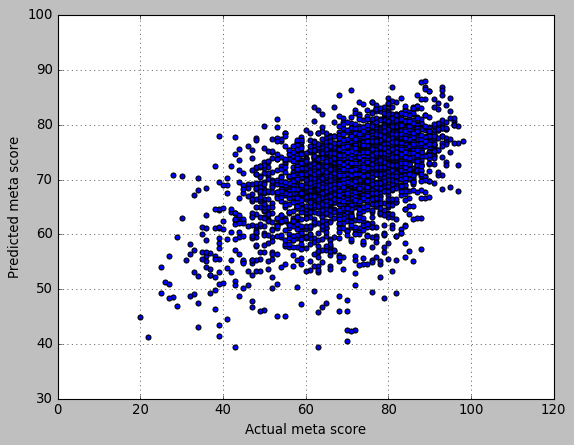

In [49]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual meta score')
plt.ylabel('Predicted meta score')
plt.grid()
plt.show()

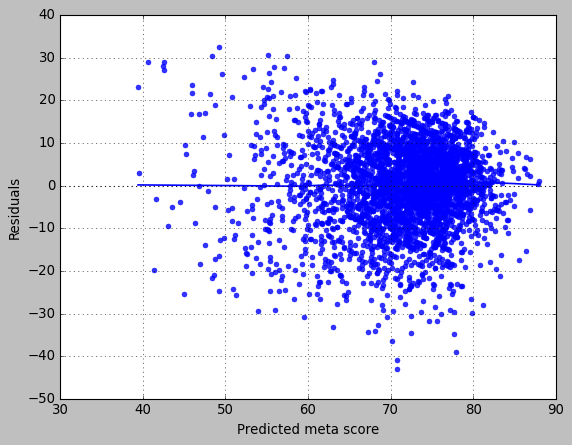

In [46]:
residuals = y_test - y_pred
sns.residplot(x=y_pred, y=residuals, lowess=True)
plt.xlabel('Predicted meta score')
plt.ylabel('Residuals')
plt.grid()
plt.show()

A residual plot is a graph that shows the difference between the predicted values and the actual values on the y-axis (the residuals) and the predicted values on the x-axis. It is a useful tool for evaluating the performance of a regression model and identifying any patterns or trends in the residuals that may suggest problems with the model.

The residuals represent the difference between the predicted values and the actual values of the dependent variable (in this case, the meta score) for each observation in the dataset. A positive residual means that the actual value is higher than the predicted value, while a negative residual means that the actual value is lower than the predicted value. The size of the residual represents the magnitude of the error in the prediction.

In a well-fitted regression model, the residuals should be randomly scattered around zero with no clear pattern or trend. This indicates that the model is capturing the underlying relationships between the independent and dependent variables, and that any remaining differences between the predicted and actual values are due to random error.

However, if the residuals exhibit a pattern or trend, this suggests that the model may be missing some important variables or that the functional form of the model may be incorrect. For example, if the residuals show a U-shaped or inverted U-shaped pattern, this may indicate that the relationship between the independent and dependent variables is non-linear, and that a more complex model is needed to capture this relationship.

Since my residual plot shows a wide spread and cone shape, it suggests that my model isn't the most accurate 

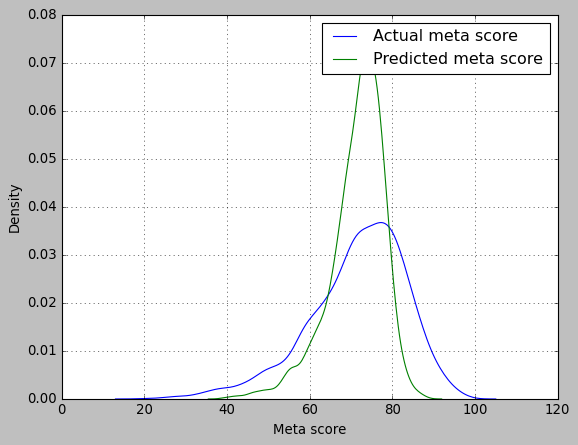

In [47]:
sns.kdeplot(y_test, label='Actual meta score')
sns.kdeplot(y_pred, label='Predicted meta score')
plt.xlabel('Meta score')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

A KDE plot (Kernel Density Estimate plot) is a type of plot that visualizes the probability density function of a dataset. It is similar to a histogram in that it shows the distribution of the data, but it is smoother and provides a more continuous estimate of the density function.

KDE plots are created by estimating the density function of the data using a kernel function, which is a mathematical function that acts as a weighting function for each data point. The kernel function is centered on each data point and has a bandwidth parameter that determines the width of the kernel. The kernel density estimate is the sum of the kernel functions for all data points, normalized to create a probability density function.

KDE plots are useful for visualizing the shape of the data distribution and identifying features such as peaks, valleys, and modes. They are often used in exploratory data analysis to gain insights into the data before applying statistical models or machine learning algorithms.

In my KDE plot, the estimated values are significantly larger than the actual values, it suggests that there is a region of the data where the density of observations is much higher than what the model predicted. This could indicate that the model is not capturing some important aspect of the data, or that there is a data point or group of data points that is exerting a strong influence on the estimated density function.

In [61]:
#I'm going to try again. This time with a polynomial regression approach
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Create polynomial features of degree 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit linear regression model to polynomial features
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Make predictions using the polynomial regression model
y_pred = lin_reg.predict(X_poly)


In [62]:
r2 = r2_score(y, y_pred)
print('R2 score:', r2)
print('Mean squared error:', mean_squared_error(y, y_pred))

R2 score: 0.40530392789143155
Mean squared error: 88.6653469819555


Technically a small improvement here. 

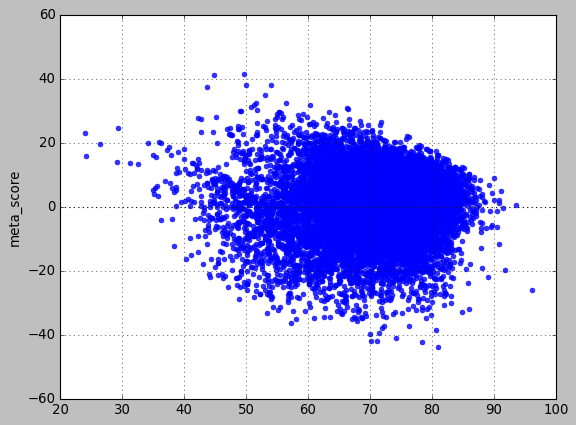

In [58]:
sns.residplot(x=y_pred, y=y)
plt.grid()
plt.show()

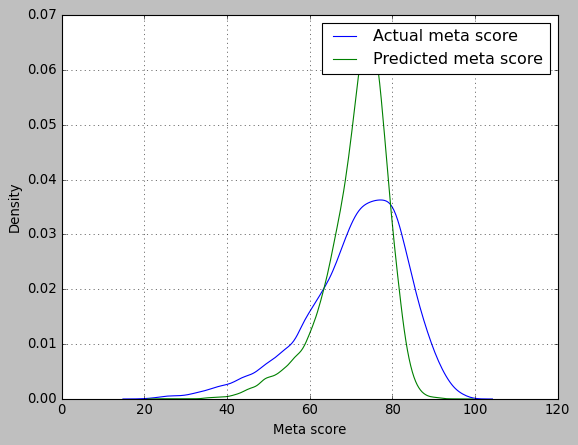

In [59]:
#sns.kdeplot(residuals, label='residuals')
sns.kdeplot(y, label='Actual meta score')
sns.kdeplot(y_pred, label='Predicted meta score')
plt.xlabel('Meta score')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()